<h3>Model Performance Testing<h3>

In [148]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import os
from sklearn.metrics import PrecisionRecallDisplay
import tensorflow as tf

<h4>Load Model<h4>

In [135]:
model = load_model('gesture.h5')

<h4>Confusion Matrix</h4>

In [136]:
from sklearn.metrics import classification_report

In [137]:
path = "Dataset/test/"
test_images_path = []
labels = []
y_test = []
for directory in os.listdir(path):
    for img_name in os.listdir(path+directory ):
        test_images_path.append(path+directory+"/"+img_name)
        labels.append(int(directory))
        q = [0]*6 
        q[int(directory)] = 1
        y_test.append(q)

In [147]:
predicted_list = []
X_test=[]
predicted_prob = []
for img_path in test_images_path:
    img = image.load_img(img_path,grayscale=True,target_size=(64,64))
    x = image.img_to_array(img)
    X_test.append(x)
    x = np.expand_dims(x,axis=0)
    predicted_prob.append(model.predict(x))
    pred = np.argmax(model.predict(x),axis=1)
    predicted_list.append(pred)


In [139]:
predicted_prob = np.array(predicted_prob)
y_test = np.array(y_test).reshape(30,1,6)

In [140]:
matrix = tf.math.confusion_matrix(labels,predicted_list)
print("The Confusion Matrix")
cm=pd.DataFrame(matrix,index=['gesture-0','gesture-1','gesture-2','gesture-3','gesture-4','gesture-5'],
                columns=['gesture-0','gesture-1','gesture-2','gesture-3','gesture-4','gesture-5'])
print(cm)

The Confusion Matrix
           gesture-0  gesture-1  gesture-2  gesture-3  gesture-4  gesture-5
gesture-0          5          0          0          0          0          0
gesture-1          0          5          0          0          0          0
gesture-2          0          1          4          0          0          0
gesture-3          0          0          0          5          0          0
gesture-4          0          0          0          2          3          0
gesture-5          0          0          0          0          0          5


<h4>Classification Report </h4>

In [141]:
print(classification_report(labels, predicted_list))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       0.71      1.00      0.83         5
           4       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         5

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



<h4>Accuracy Score</h4>

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy = accuracy_score(labels,predicted_list)
print("Accuracy is ",accuracy)

Accuracy is  0.9


<h4>Recall </h4>

In [144]:
from sklearn.metrics import recall_score
recall = recall_score(labels,predicted_list,average='micro')
print("Recall is ",recall)

Recall is  0.9


<h4>F1 score </h4>

In [145]:
from sklearn.metrics import f1_score
f1_score = f1_score(labels,predicted_list,average='micro')
print("F1 score is ",f1_score)

F1 score is  0.9


<h4>Precision Recall Graph</h4>

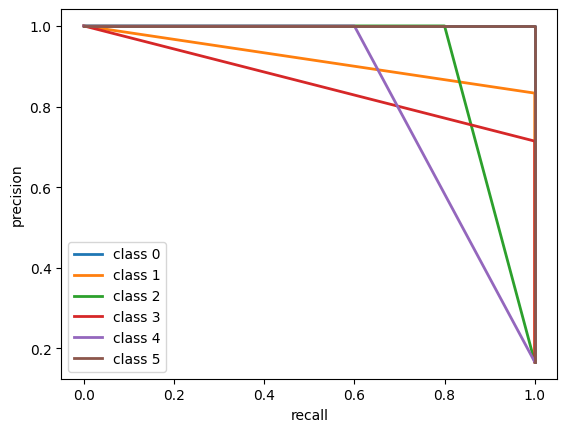

In [123]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
n_classes = 6
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, :,i],
                                                        predicted_prob[:, :,i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()